#Customer Segmentation using K means Clustering:
Customer segmentation involves dividing a customer base into distinct groups that share similar characteristics, behaviors and needs to enable personalized marketing, pricing, promotions and experiences

##Importing libraries

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

##The files.upload() function in google colab is used to upload local files from your computer to the Colab runtime.

In [3]:
from google.colab import files

uploaded = files.upload()


Saving online_retail_dataset.csv to online_retail_dataset (2).csv


In [4]:
import pandas as pd
import io

dataset = pd.read_csv('/content/online_retail_dataset.csv')
print(dataset)

       CustomerID  Age  Gender  AnnualIncome  SpendingScore     Product  \
0            1800   33    Male         63077            759        Sofa   
1            1030   21    Male         68529           9753  Smartphone   
2            1342   32  Female        118503          10539       Shoes   
3            1145   52  Female         64095           2862      Laptop   
4            1880   57  Female         93691           7321        Lamp   
...           ...  ...     ...           ...            ...         ...   
49995        1256   46  Female         59566          10665        Sofa   
49996        1278   40    Male         65569           1158          AC   
49997        1580   49  Female         68246           2471     Clothes   
49998        1866   67    Male        137741          10553          TV   
49999        1120   50    Male         30940           6097      Laptop   

       ProductPrice  
0            367.98  
1            409.54  
2            952.16  
3          

##Getting the head count of the data

In [5]:
dataset.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

In [ ]:
##Checking the null values

In [6]:
dataset.isna().sum()

CustomerID       0
Age              0
Gender           0
AnnualIncome     0
SpendingScore    0
Product          0
ProductPrice     0
dtype: int64

In [7]:
dataset.shape

(50000, 7)

In [8]:
dataset.info()  #info() is used to check the Information about the data and the datatypes of each respective attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     50000 non-null  int64  
 1   Age            50000 non-null  int64  
 2   Gender         50000 non-null  object 
 3   AnnualIncome   50000 non-null  int64  
 4   SpendingScore  50000 non-null  int64  
 5   Product        50000 non-null  object 
 6   ProductPrice   50000 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ MB


##The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [9]:
dataset.describe().T

count          mean           std       min         25%  \
CustomerID     50000.0   1501.822400    289.082916   1000.00   1252.0000   
Age            50000.0     43.918760     15.270948     18.00     31.0000   
AnnualIncome   50000.0  90365.423160  34659.353398  30006.00  60497.7500   
SpendingScore  50000.0   6279.439540   3554.483980    120.00   3197.0000   
ProductPrice   50000.0    503.901067    285.434867     10.01    256.3875   

                     50%        75%        max  
CustomerID      1502.000    1752.00    2000.00  
Age               44.000      57.00      70.00  
AnnualIncome   90510.500  120494.50  150000.00  
SpendingScore   6294.500    9346.00   12450.00  
ProductPrice     502.525     751.41     999.94

In [10]:
dataset.isna().sum()

CustomerID       0
Age              0
Gender           0
AnnualIncome     0
SpendingScore    0
Product          0
ProductPrice     0
dtype: int64

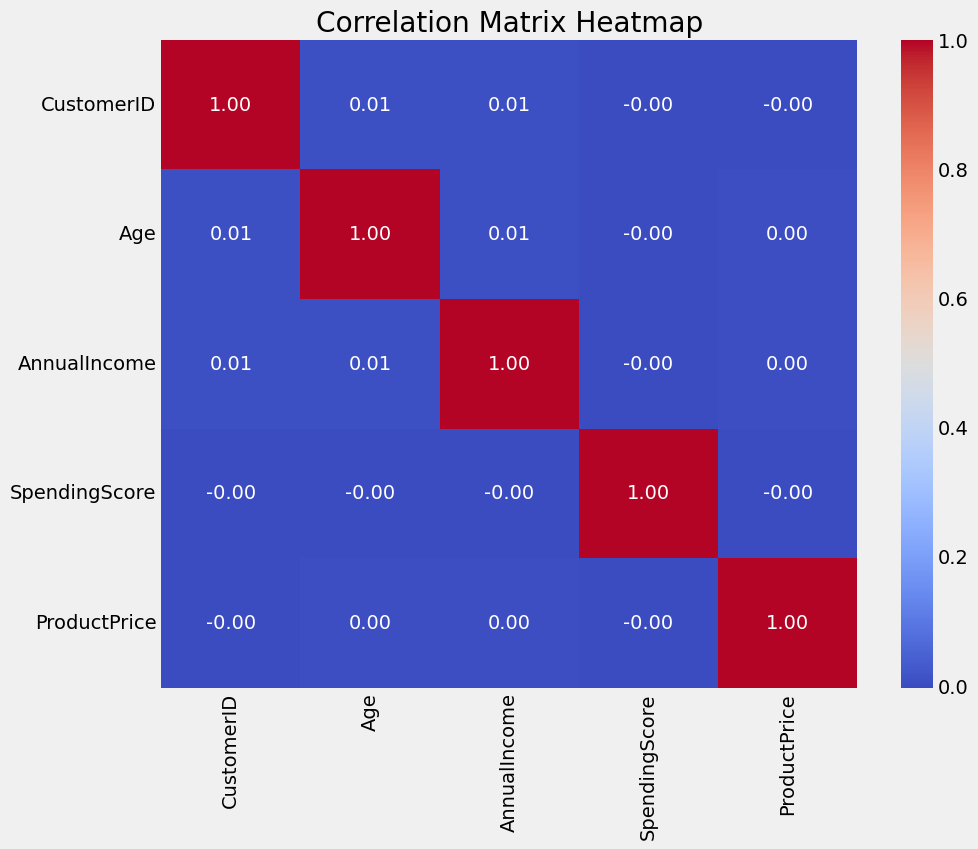

In [11]:
# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

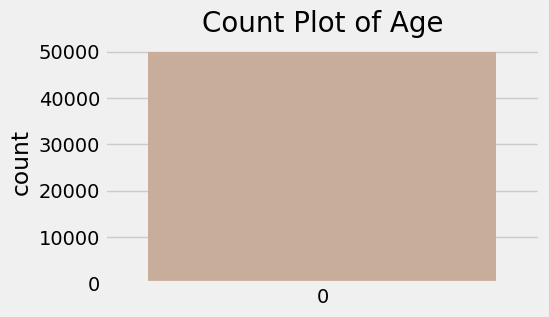

In [12]:
plt.rcParams['figure.figsize'] = (5, 3)
sns.countplot(dataset['Age'], palette = 'pink')
plt.title('Count Plot of Age', fontsize = 20)
plt.show()

In [13]:
# Check the data type of the 'Gender' column
print(dataset['Gender'].dtype)  # Make sure it's object or categorical

object


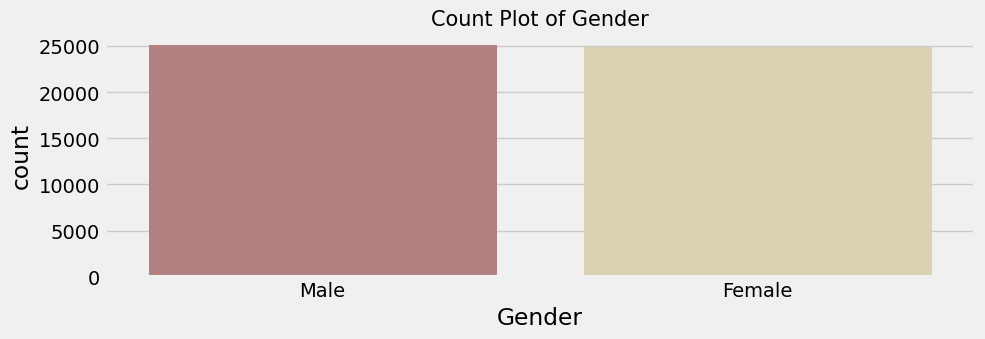

In [14]:
plt.rcParams['figure.figsize'] = (10, 3)
sns.countplot(data=dataset, x='Gender', palette='pink', order=dataset['Gender'].value_counts().index)
plt.title('Count Plot of Gender', fontsize=15)
plt.show()


In [15]:
#Defining scatter plot function
def scatters(col1,col2):
    fig = px.scatter(dataset, x=col1, y=col2 , color="Gender", template = 'plotly_dark')
    return fig.show()

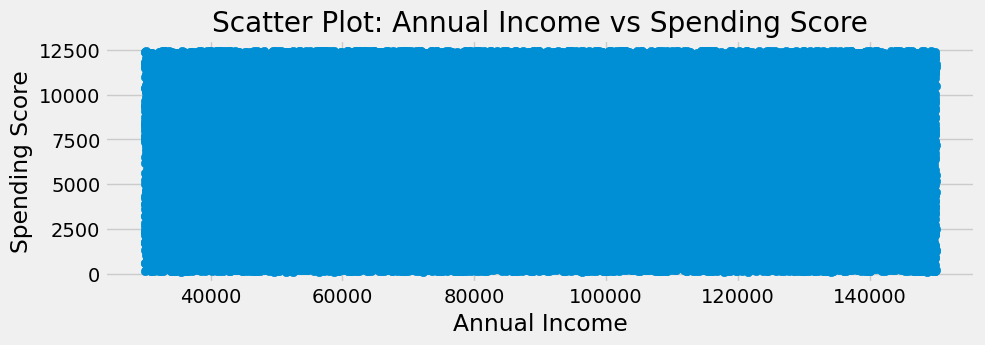

In [16]:
plt.scatter(dataset['AnnualIncome'], dataset['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot: Annual Income vs Spending Score')
plt.show()

In [17]:
scatters('AnnualIncome', 'SpendingScore')

In [18]:
scatters('Age', 'SpendingScore')

In [19]:
scatters('Age', 'AnnualIncome')

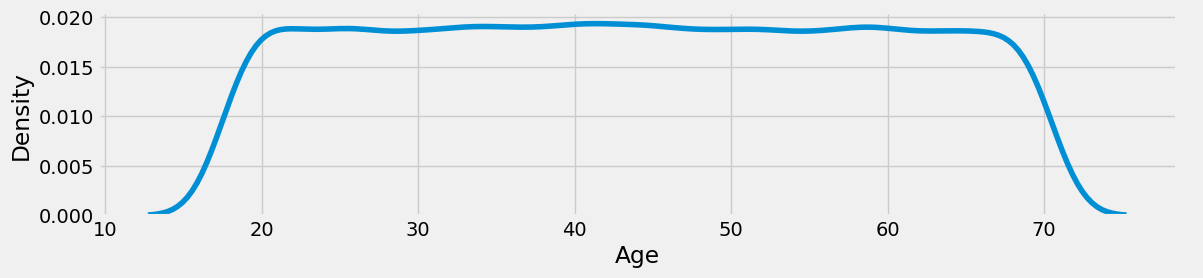

In [20]:
#Defining kde_plot plot function
def kde_plot(feature):
    grid = sns.FacetGrid(dataset,aspect=4)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()
kde_plot('Age')

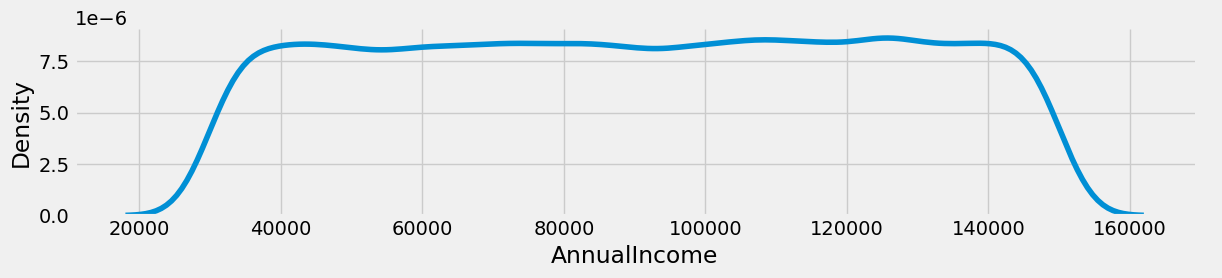

In [21]:
kde_plot('AnnualIncome')

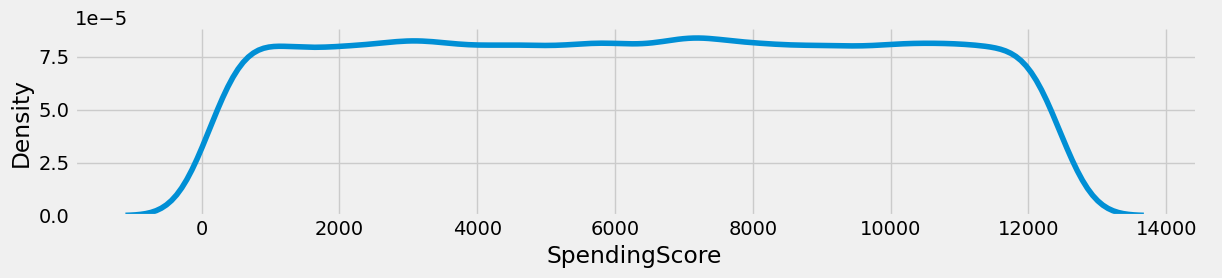

In [22]:
kde_plot('SpendingScore')

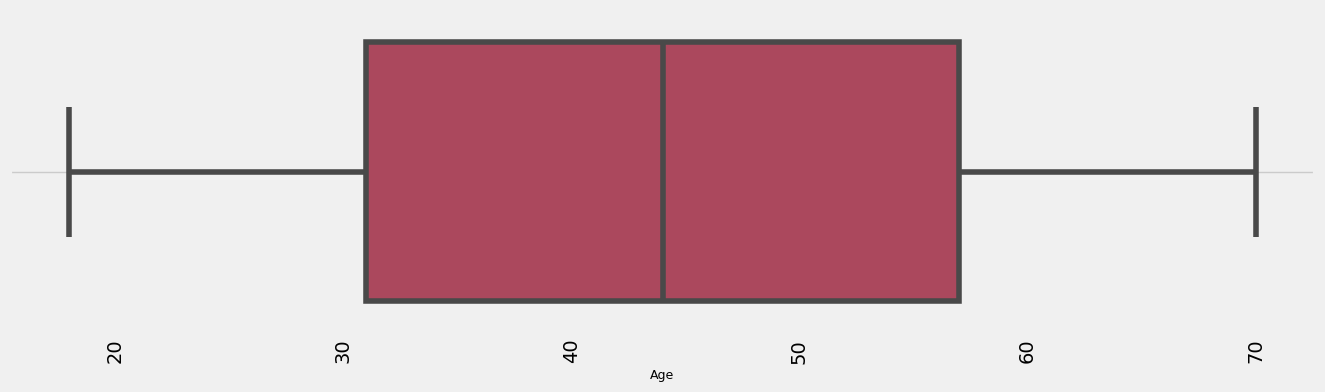

In [23]:
#Checking Outliers
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Age'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Age', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

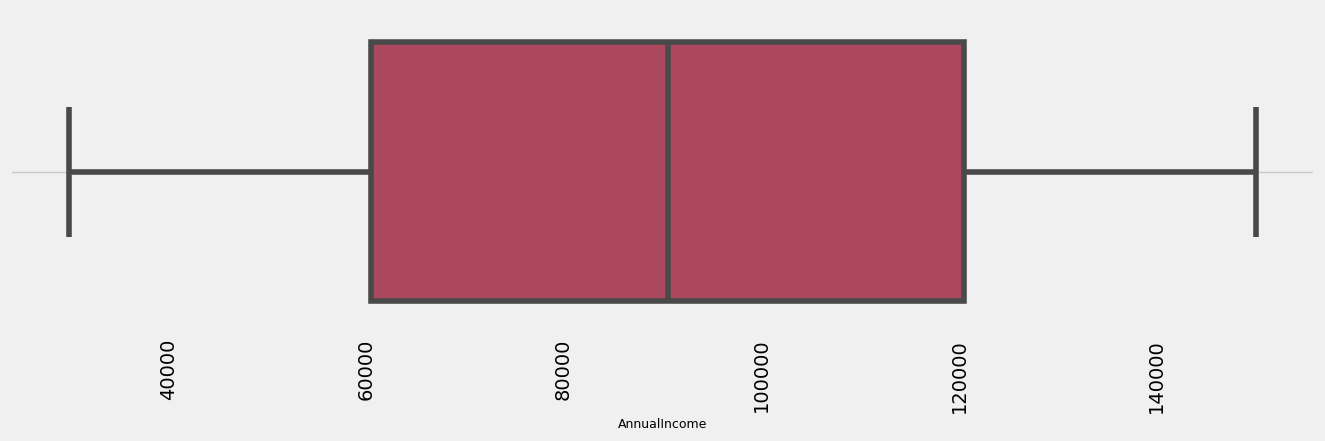

In [24]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['AnnualIncome'], palette = 'inferno')
ax.set_xlabel(xlabel = 'AnnualIncome', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

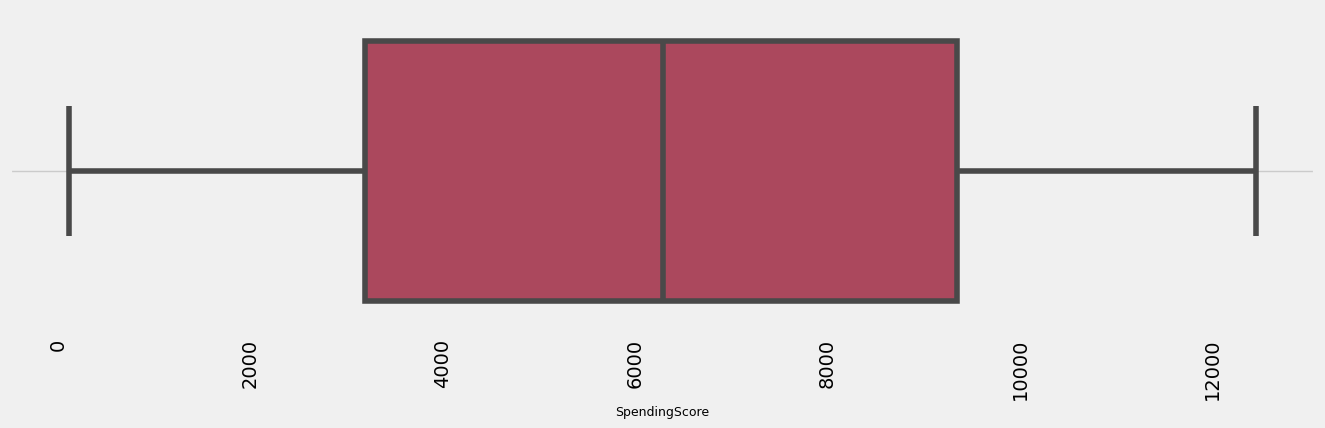

In [25]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['SpendingScore'], palette = 'inferno')
ax.set_xlabel(xlabel = 'SpendingScore', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

#K-means clustering using `Annual Income (k$)`and `Spending Score` columns

In [26]:
#Importing the dataset
X = dataset.iloc[:, [3, 4]].values

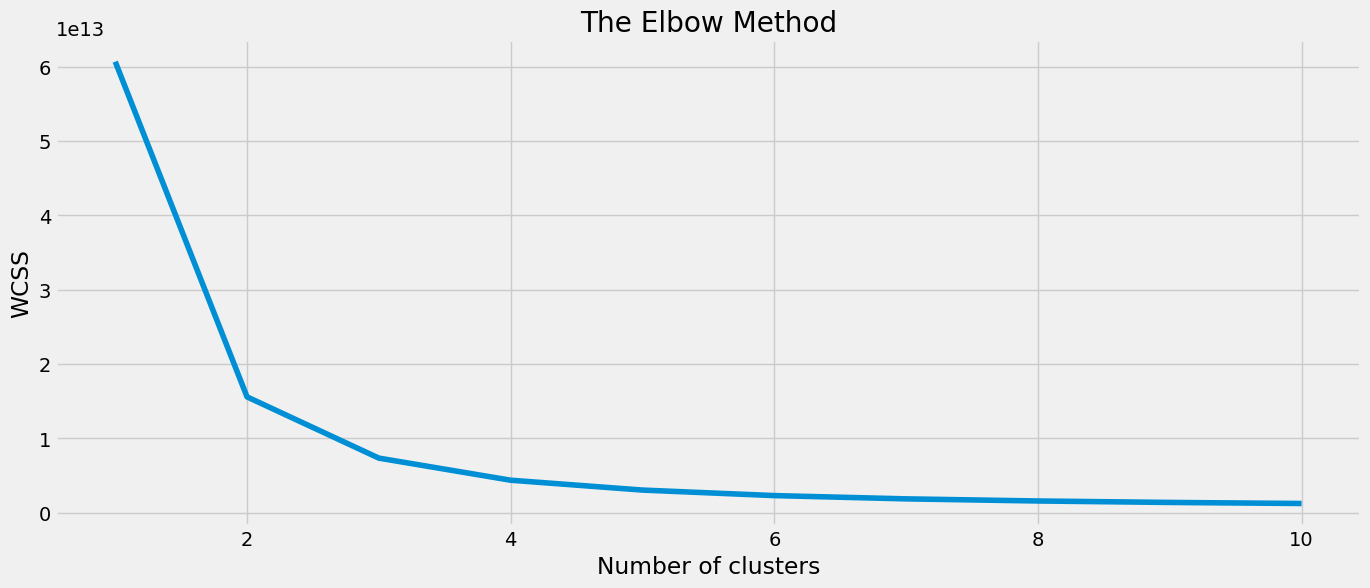

In [27]:
#Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

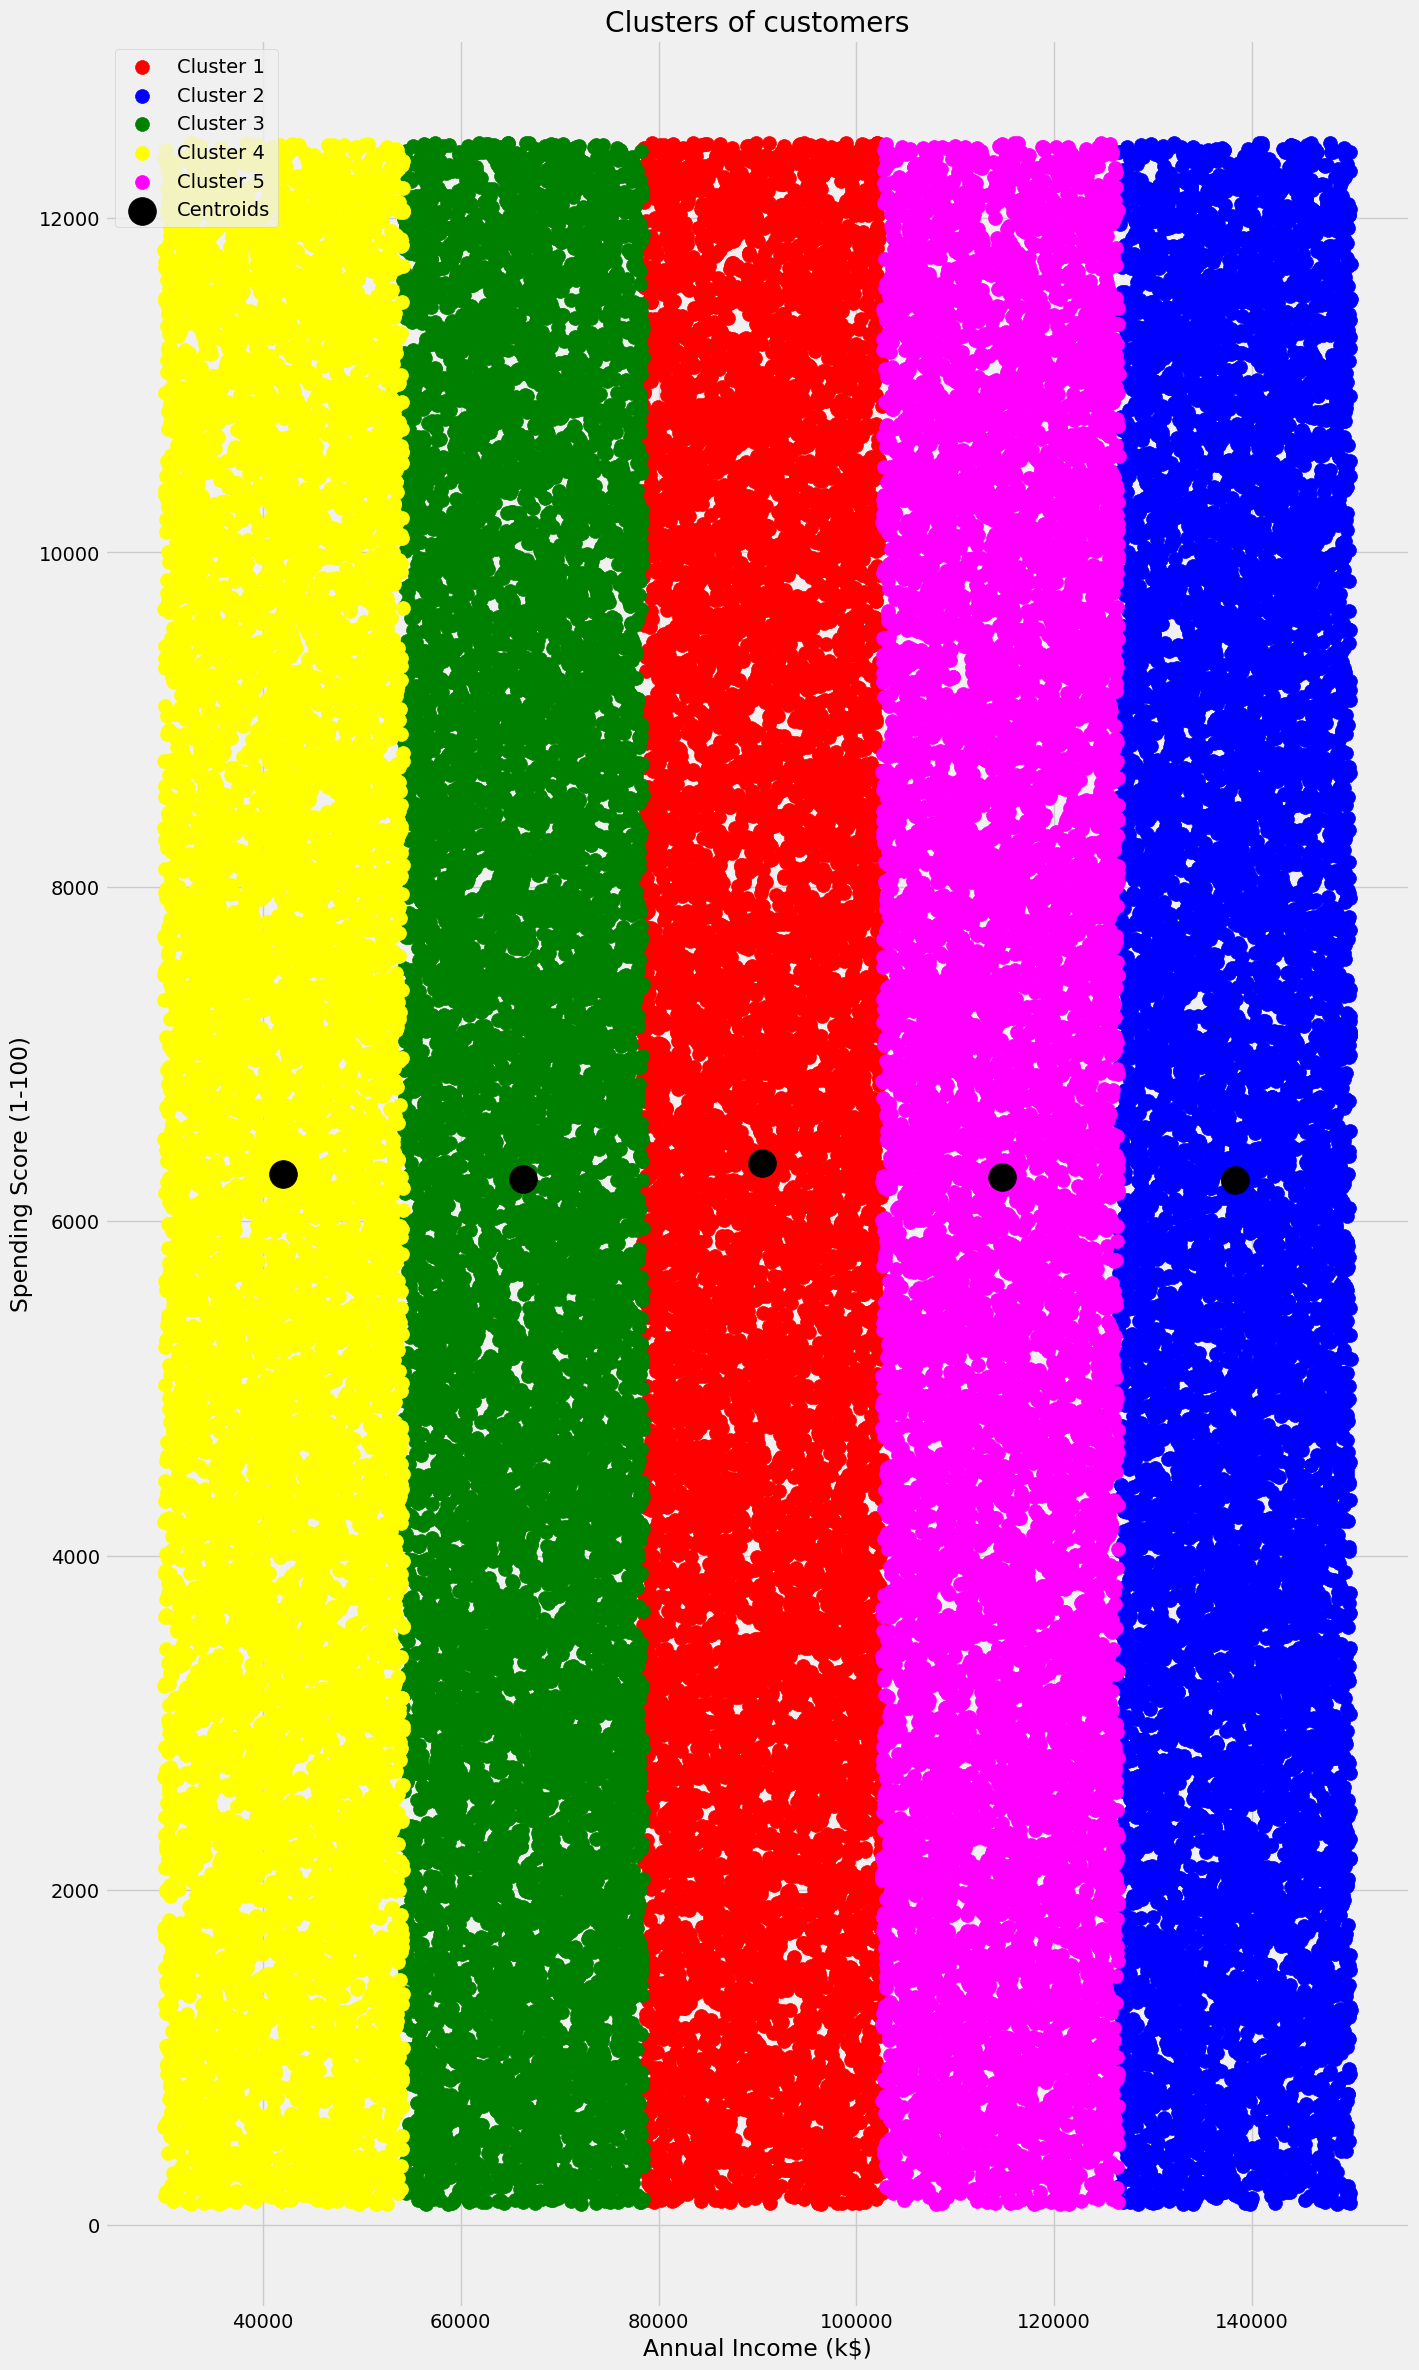

In [29]:
#Visualising the clusters
plt.figure(1 , figsize = (15 ,28))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

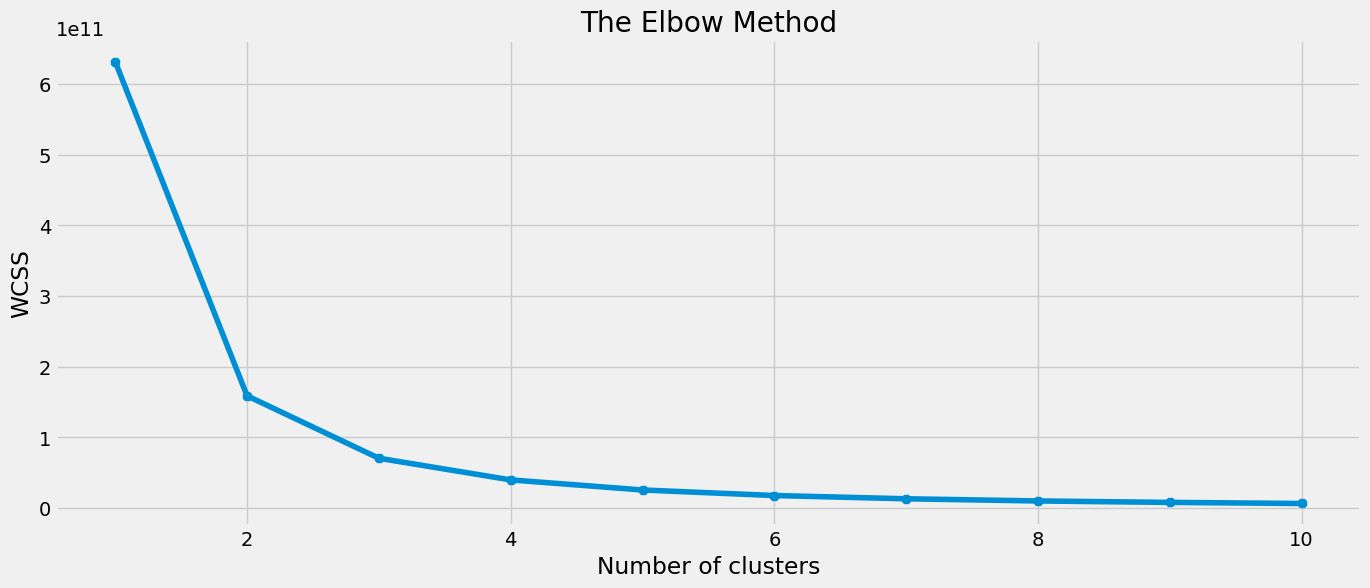

In [30]:
#kmeans clustering using Age and Spending Score columns
Z = dataset.loc[:, ['Age', 'SpendingScore']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

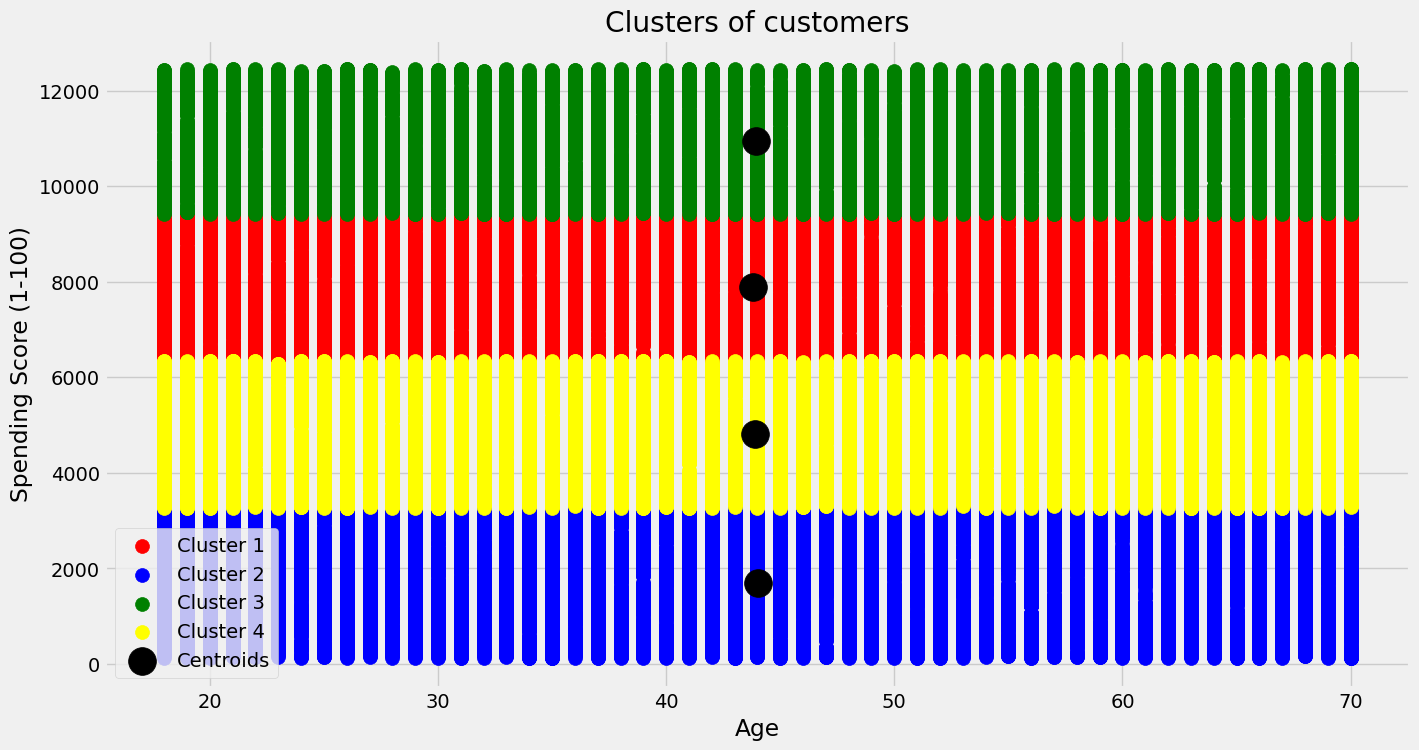

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

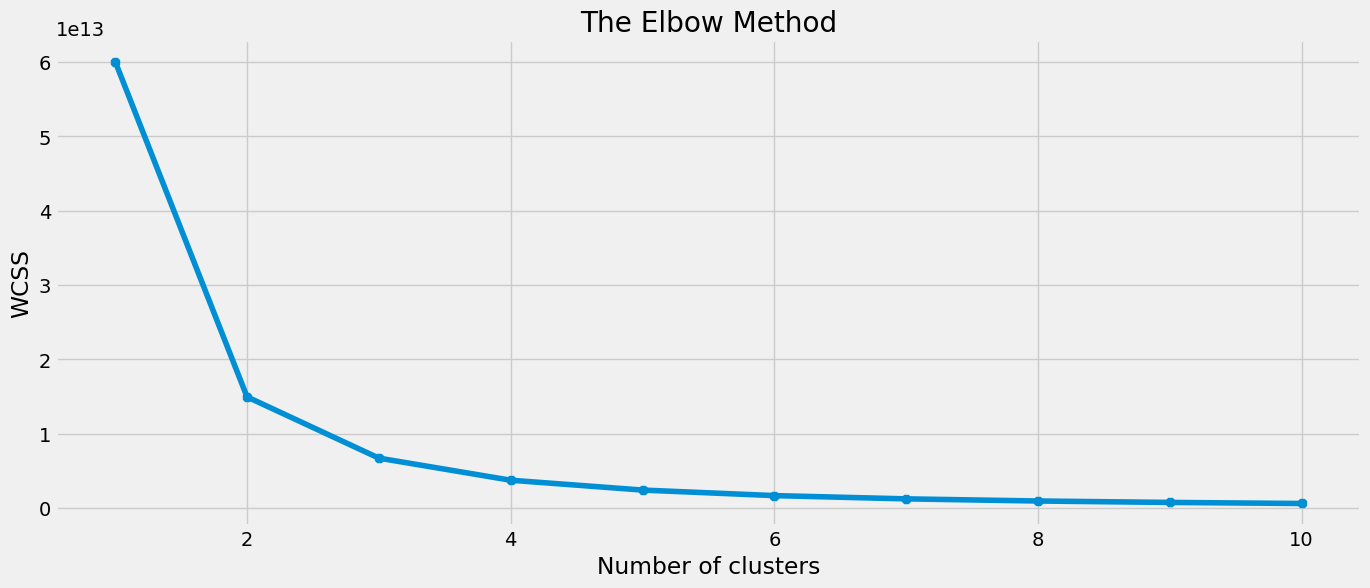

In [32]:
#kmeans clustering using `Age` and `Annual Income (k$)` columns

Y = dataset.loc[:, ['Age', 'AnnualIncome']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

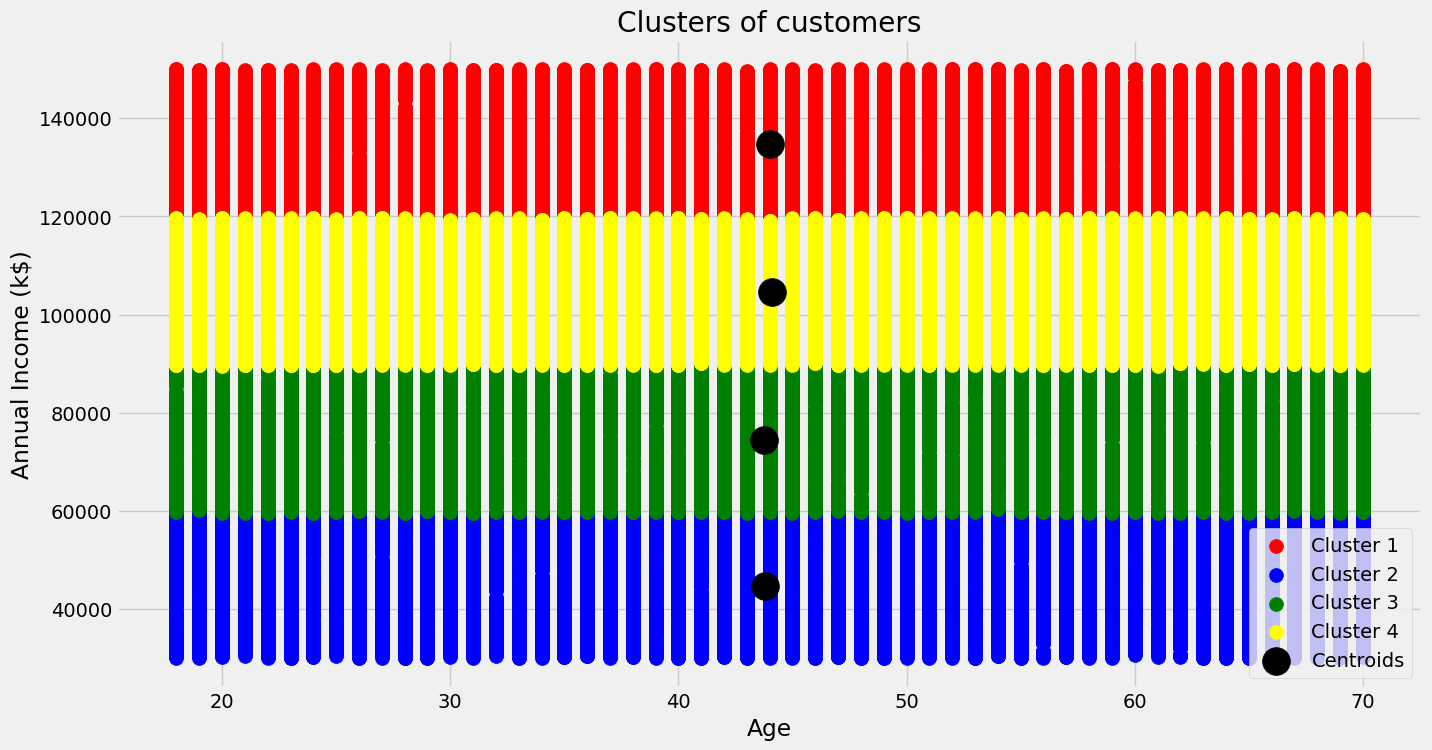

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

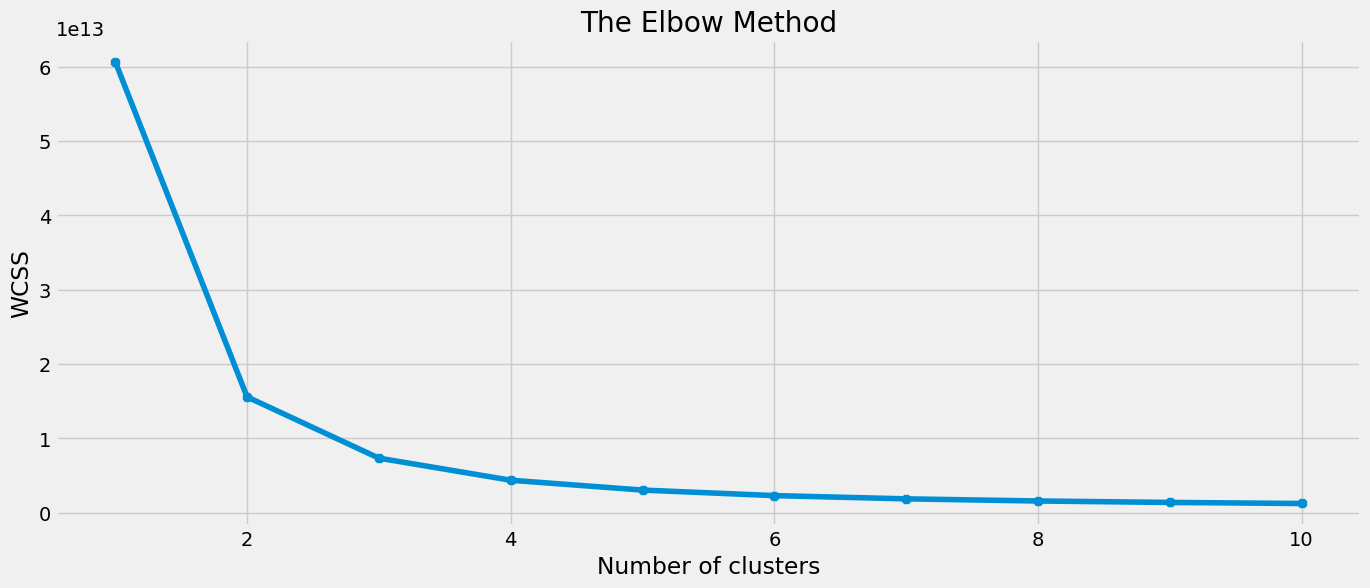

In [34]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
data = dataset.copy()  # Create a copy of the original DataFrame

# Encode categorical columns like 'Gender'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Selecting columns for clustering
columns_for_clustering = ['Age', 'AnnualIncome', 'SpendingScore']

# Segmentation using Age, Annual Income, and Spending Score
segmentation_data = data[columns_for_clustering]

# Perform K-means clustering
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    kmeans.fit(segmentation_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(15, 6))
plt.plot(range(1, 11), wcss, marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [35]:
from sklearn.cluster import KMeans
import plotly.express as px

# Assuming 'dataset' is your DataFrame
data = dataset.copy()  # Create a copy of the original DataFrame

# Encode categorical columns like 'Gender'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Selecting columns for clustering
columns_for_clustering = ['Age', 'AnnualIncome', 'SpendingScore']

# Exclude non-numeric columns like 'Gender'
A = data[columns_for_clustering]

# Perform K-means clustering
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(A)
A['label'] = clusters

# Rename columns for plotting with plotly
A.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'label']

# Plotting 3D scatterplot using Plotly
fig = px.scatter_3d(A, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color='label', size='label', template='plotly_dark')
fig.show()


In [36]:
# K-means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
dataset['kmeans_cluster'] = kmeans.fit_predict(dataset[['Age', 'AnnualIncome', 'SpendingScore']])

# Determine the most frequently purchased item by a particular age group within each cluster
frequent_purchase = dataset.groupby(['kmeans_cluster', 'Age', 'Product'])['CustomerID'].count().reset_index()
idx = frequent_purchase.groupby(['kmeans_cluster', 'Age'])['CustomerID'].transform(max) == frequent_purchase['CustomerID']
most_purchased = frequent_purchase[idx]

print("Most purchased item by each age group within each cluster:")
print(most_purchased)



Most purchased item by each age group within each cluster:
      kmeans_cluster  Age     Product  CustomerID
0                  0   18          AC          25
11                 0   19     Dustbin          24
23                 0   20       Shoes          23
35                 0   21          TV          26
40                 0   22      Laptop          22
...              ...  ...         ...         ...
2820               5   66        Lamp          22
2828               5   67     Dustbin          21
2843               5   68          TV          27
2850               5   69  Smartphone          27
2856               5   70        Lamp          22

[361 rows x 4 columns]


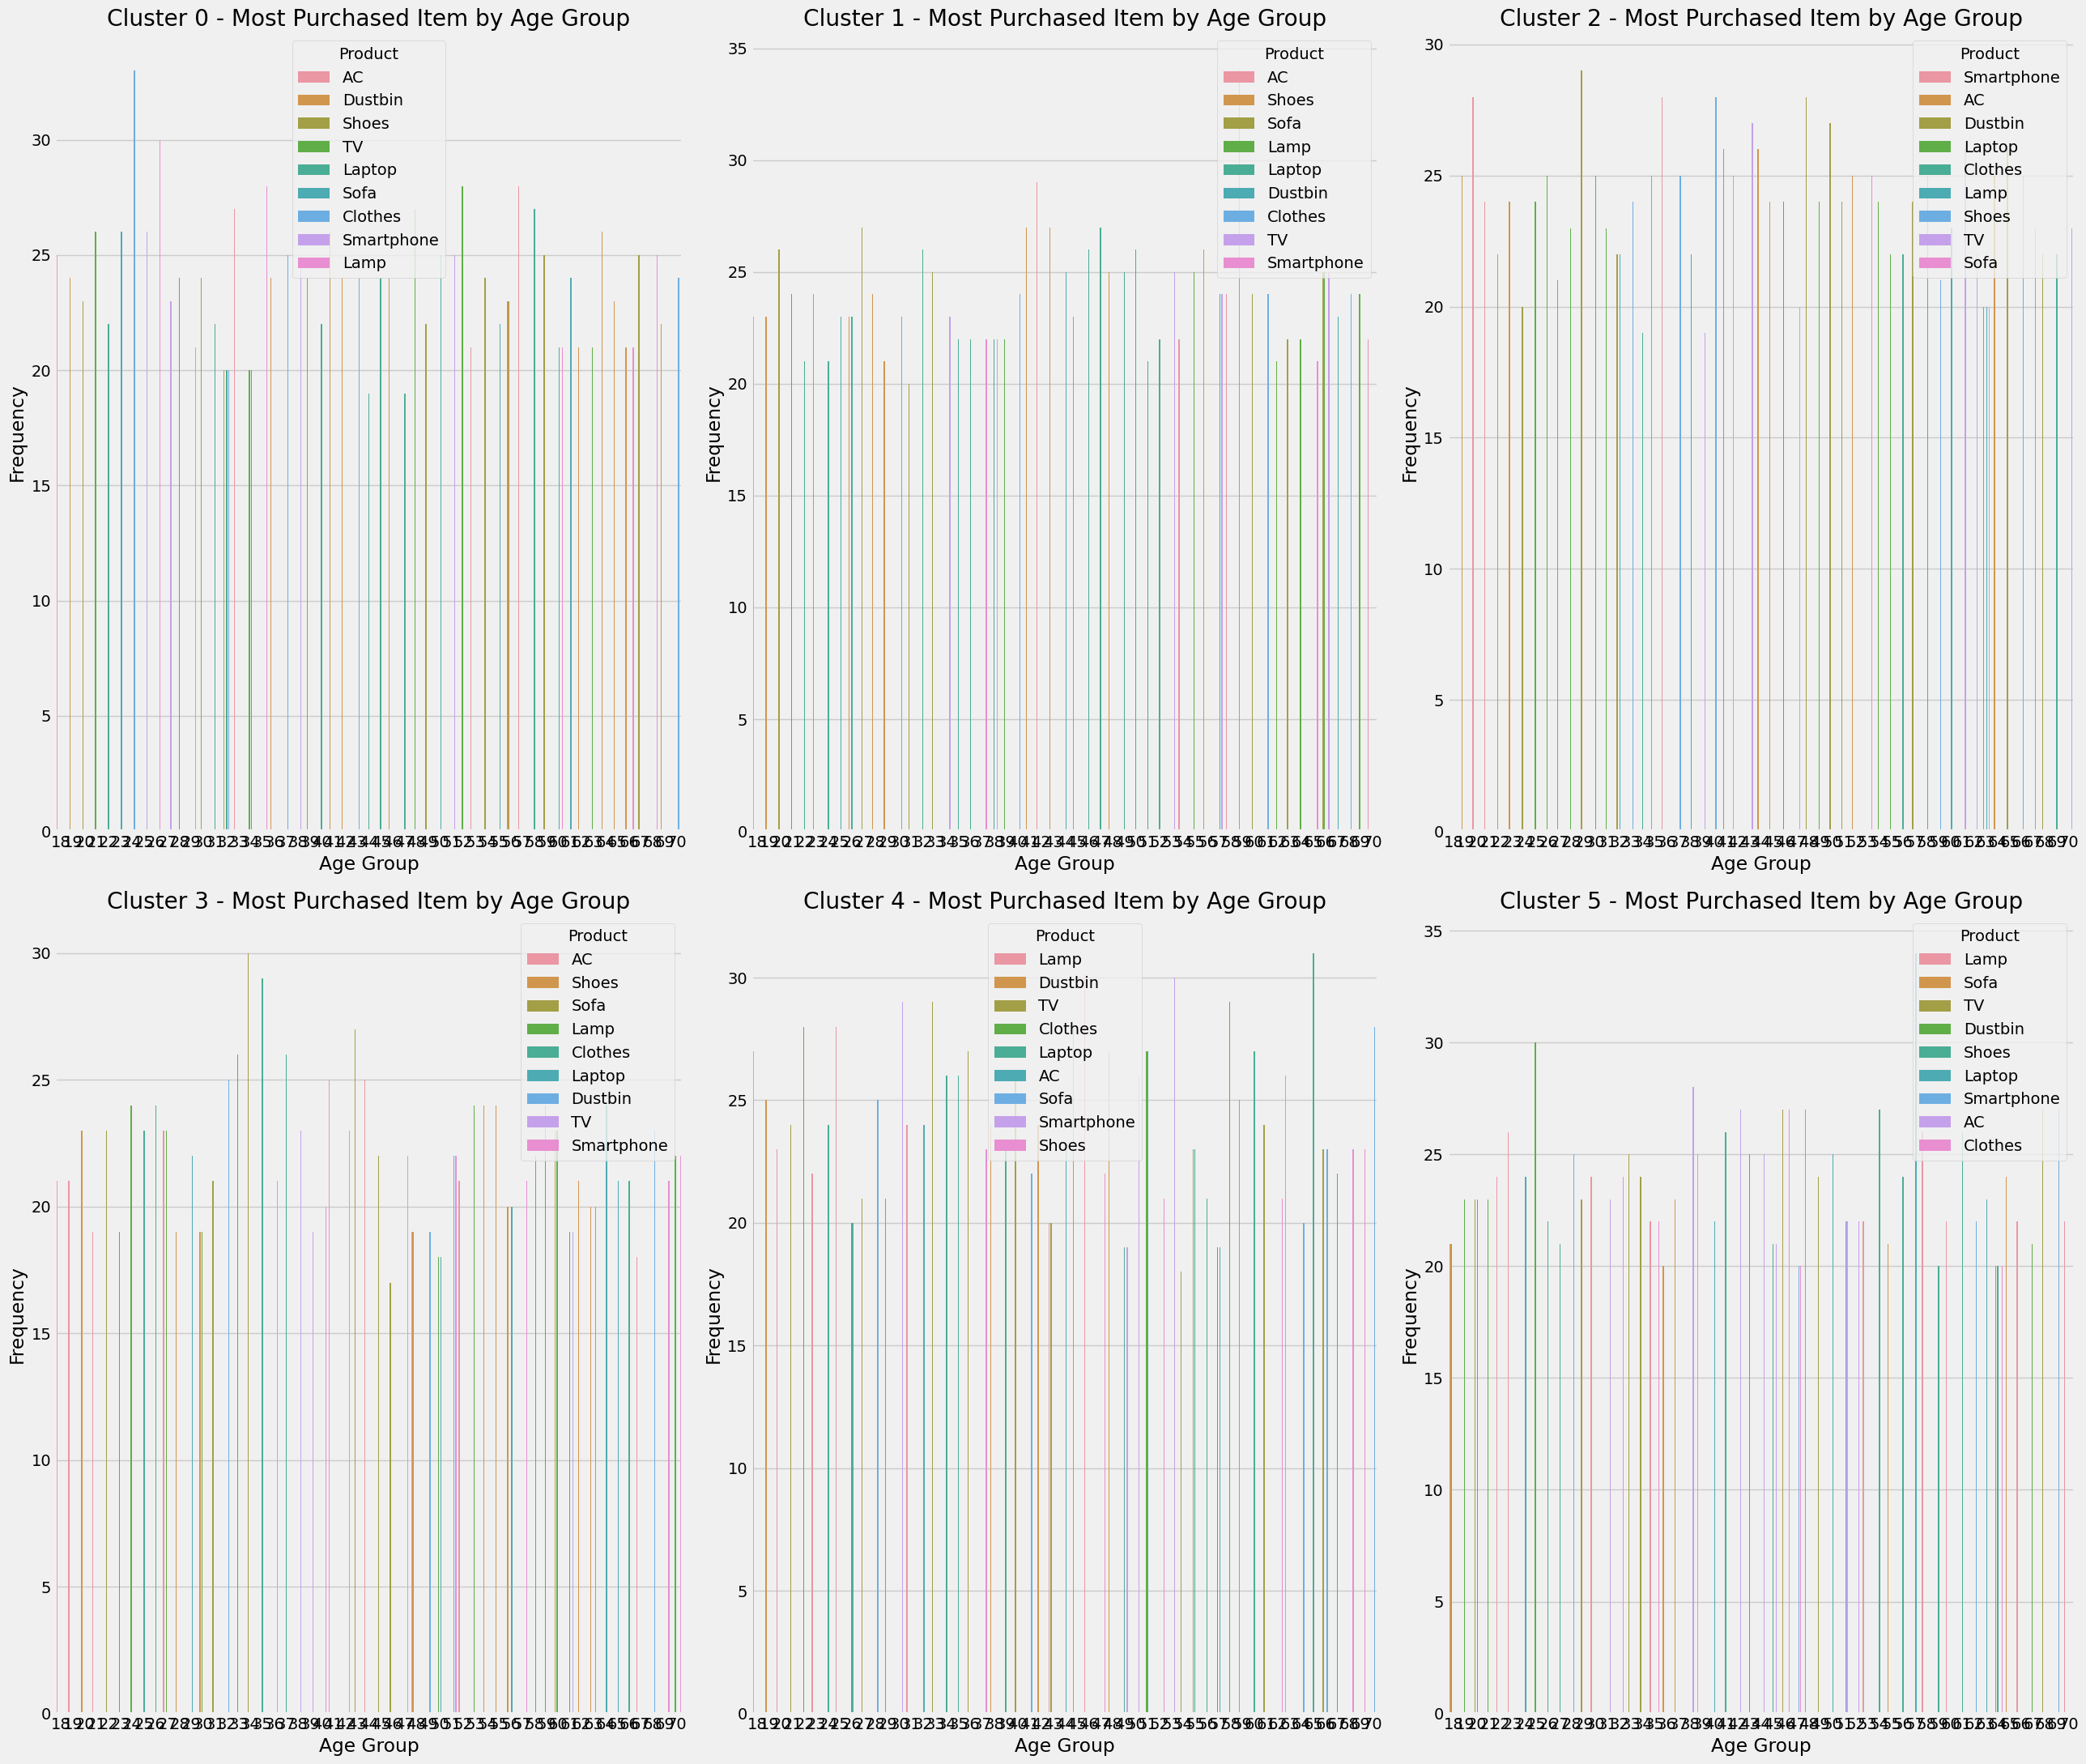

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'most_purchased' DataFrame holds the most purchased item by each age group within each cluster

# Set up the figure and axes for plotting
plt.figure(figsize=(26, 22))

# Loop through each cluster to create a bar plot
for cluster in most_purchased['kmeans_cluster'].unique():
    # Subset data for the specific cluster
    cluster_data = most_purchased[most_purchased['kmeans_cluster'] == cluster]

    # Plotting bar chart for the cluster
    plt.subplot(2, 3, cluster+1)  # Create subplots for each cluster
    sns.barplot(x='Age', y='CustomerID', hue='Product', data=cluster_data)
    plt.title(f'Cluster {cluster} - Most Purchased Item by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [38]:
print(A.head())


   Age  Annual Income (k$)  Spending Score (1-100)  label
0   33               63077                     759      4
1   21               68529                    9753      4
2   32              118503                   10539      1
3   52               64095                    2862      4
4   57               93691                    7321      3


In [39]:
# Check the presence and content of the 'label' column
print(A['label'].head())

# Verify unique values in the 'label' column
print(A['label'].unique())

print(A.columns)

0    4
1    4
2    1
3    4
4    3
Name: label, dtype: int32
[4 1 3 5 2 0]
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'label'], dtype='object')


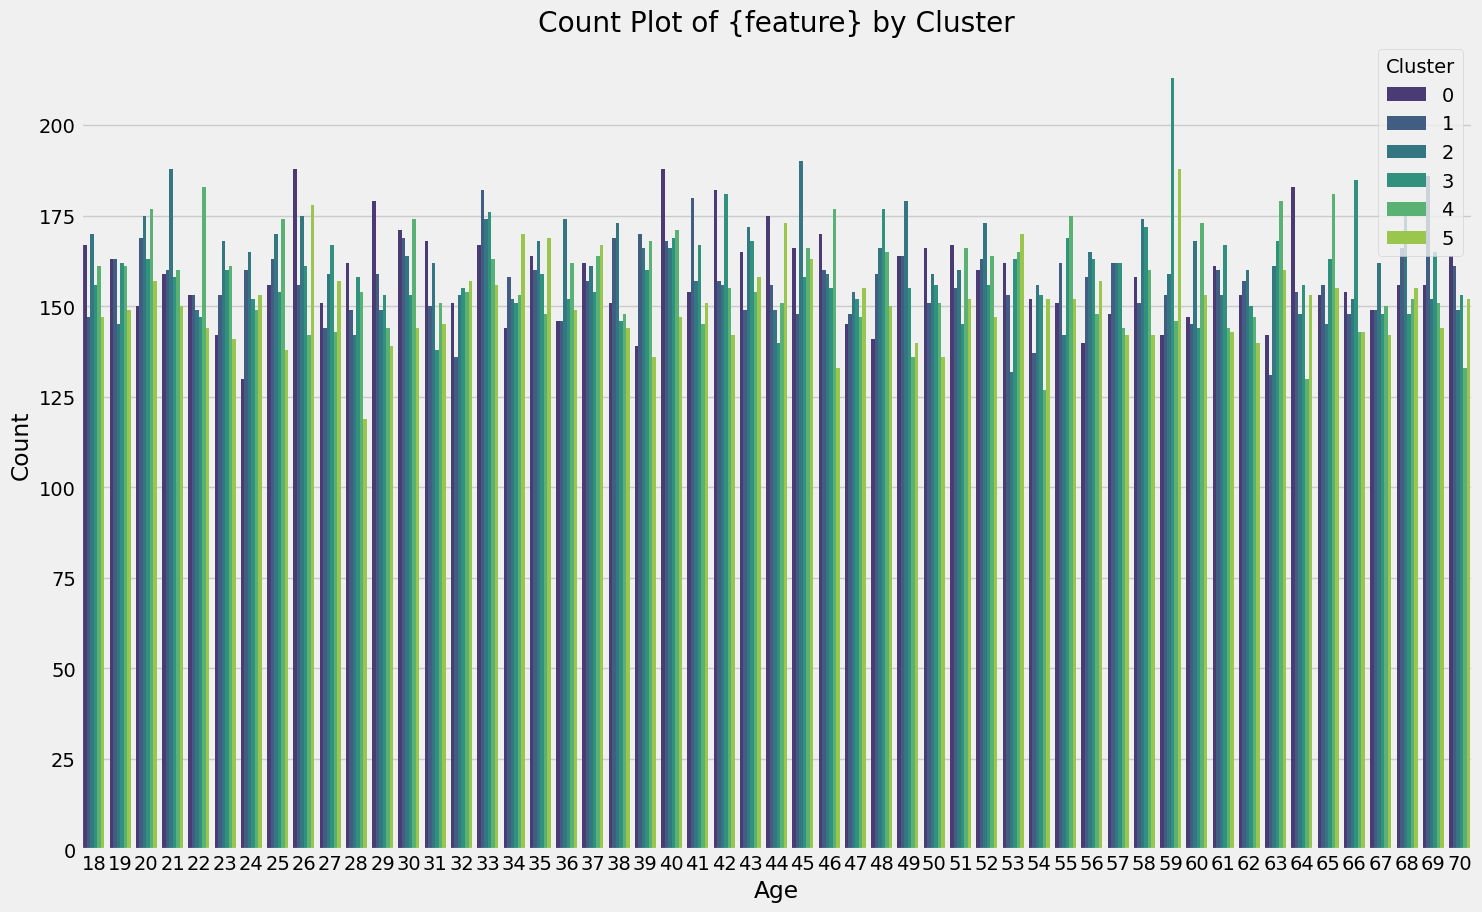

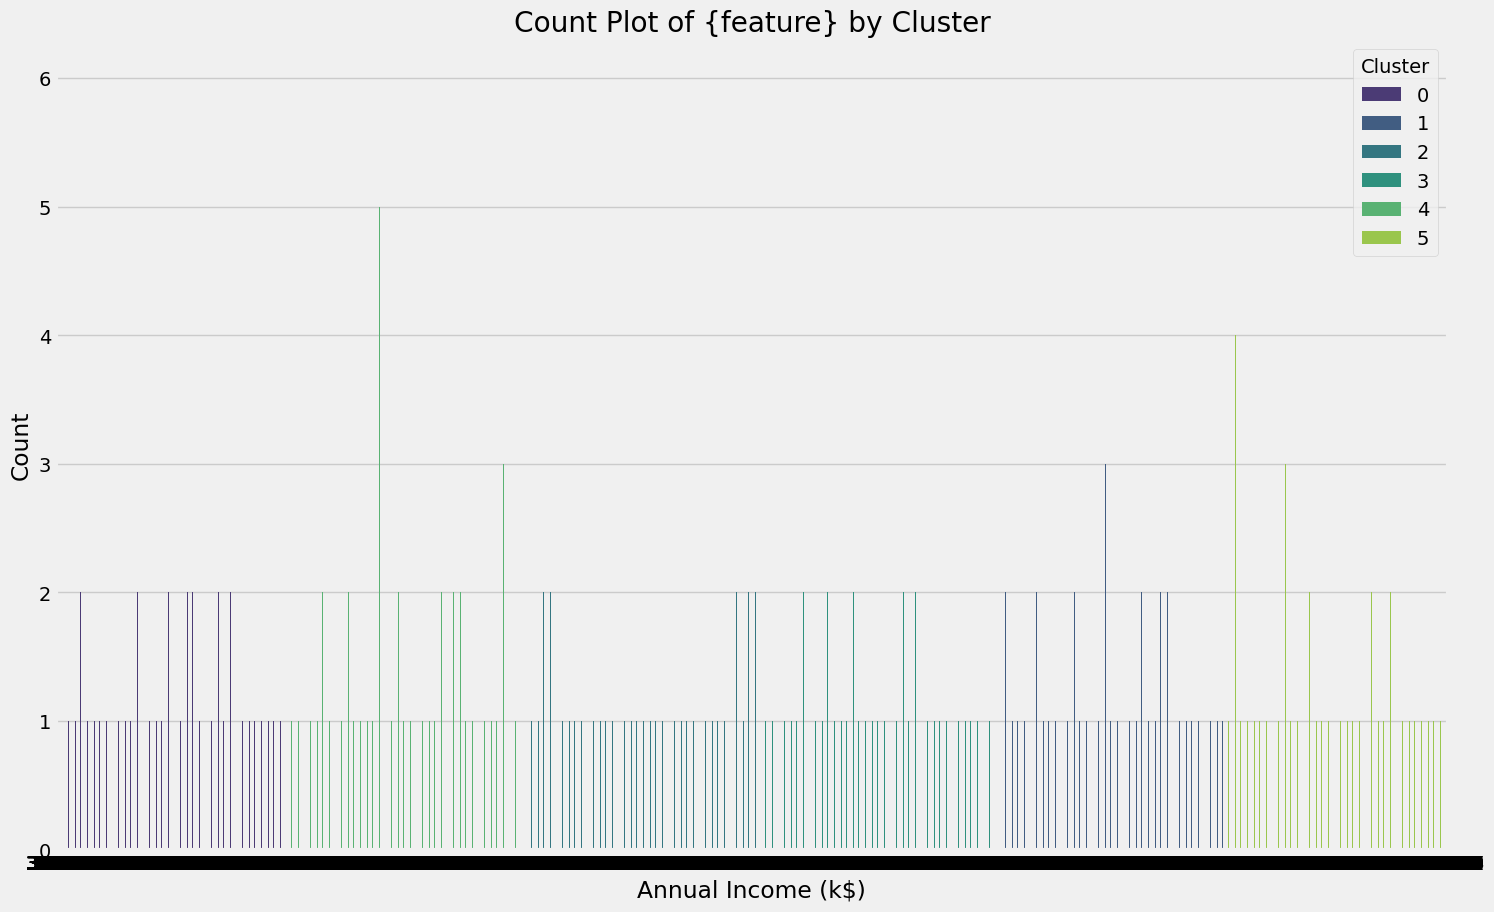

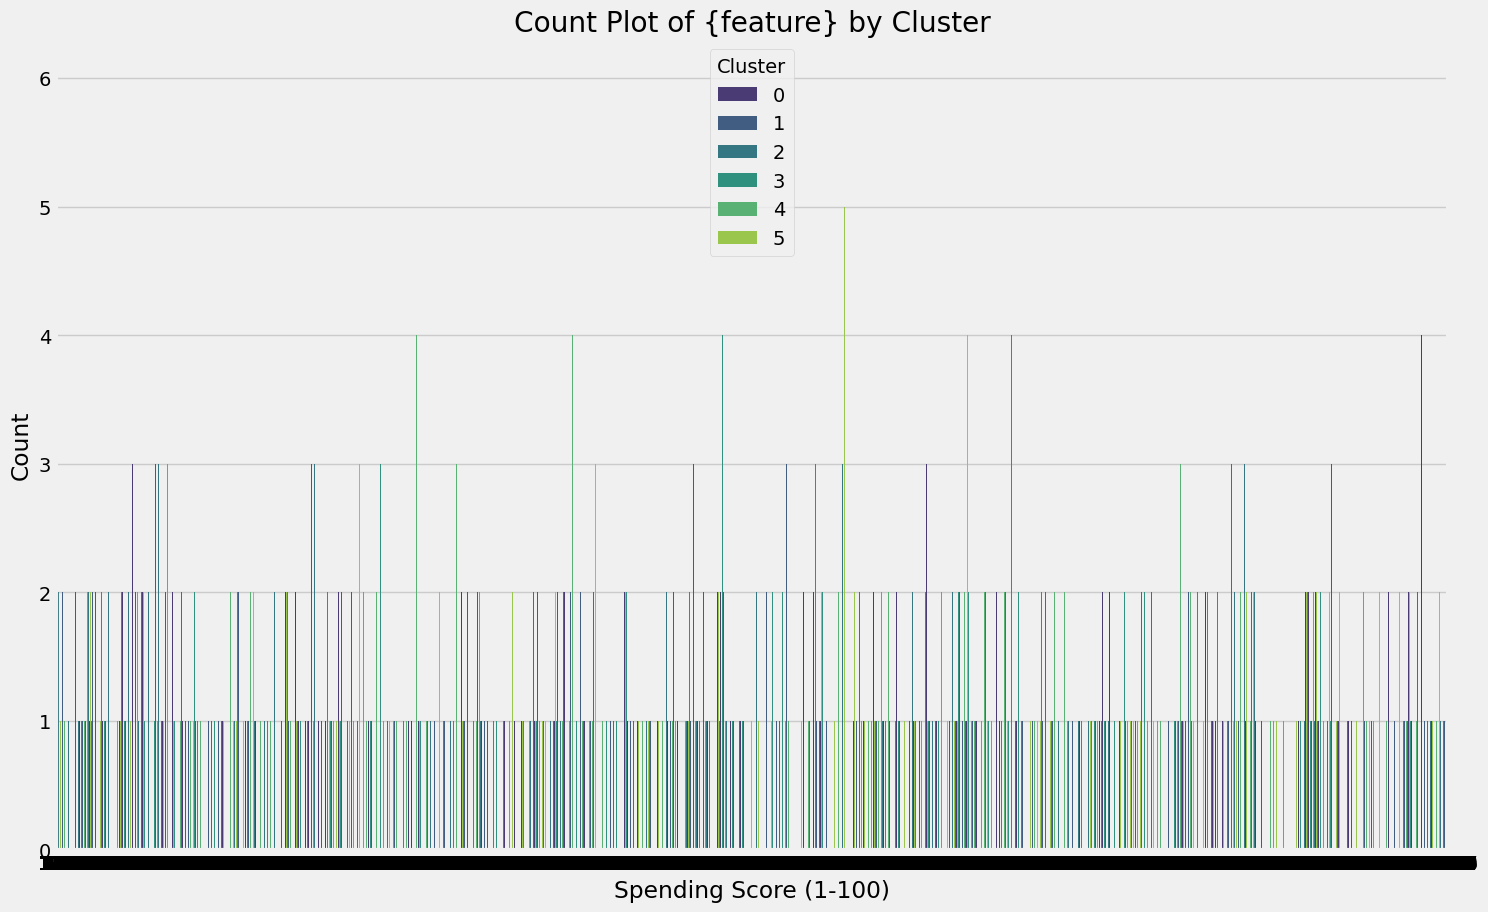

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting count plots of clusters against different features
cluster_column = 'label'  # Assuming 'label' is the column representing the cluster labels

# Plotting count plots for each feature against clusters
features_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in features_to_plot:
    plt.figure(figsize=(16, 10))
    sns.countplot(data=A, x=feature, hue=cluster_column, palette='viridis')
    plt.title('Count Plot of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.show()


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import io

dataset = pd.read_csv('online_retail_dataset.csv')
print(dataset.head())  # Display the first few rows of the dataset

# Assuming 'dataset' contains your data and columns 'Age', 'AnnualIncome', 'SpendingScore'
X = dataset[['Age', 'AnnualIncome', 'SpendingScore']]

# K-means Clustering
kmeans = KMeans(n_clusters=6)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_clusters)

# Hierarchical Clustering (Agglomerative Clustering)
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X)
hc_silhouette = silhouette_score(X, hc_clusters)

# Compare silhouette scores
print(f"Silhouette Score for K-means Clustering: {kmeans_silhouette}")
print(f"Silhouette Score for Hierarchical Clustering: {hc_silhouette}")

# Compare and print the better algorithm based on silhouette scores
if kmeans_silhouette > hc_silhouette:
    print("K-means clustering has a better silhouette score.")
elif kmeans_silhouette < hc_silhouette:
    print("Hierarchical clustering has a better silhouette score.")
else:
    print("Both clustering algorithms have similar silhouette scores.")


   CustomerID  Age  Gender  AnnualIncome  SpendingScore     Product  \
0        1800   33    Male         63077            759        Sofa   
1        1030   21    Male         68529           9753  Smartphone   
2        1342   32  Female        118503          10539       Shoes   
3        1145   52  Female         64095           2862      Laptop   
4        1880   57  Female         93691           7321        Lamp   

   ProductPrice  
0        367.98  
1        409.54  
2        952.16  
3        823.95  
4        852.07  
